In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

#Import requests library 
import requests

#Import API key
from config import weather_api_key 

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the L&L to a list 
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each L&L combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

593

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | pangnirtung
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | taoudenni
Processing Record 6 of Set 1 | marcona
City not found. Skipping...
Processing Record 7 of Set 1 | concepcion
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | skibbereen
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | saint anthony
Processing Record 16 of Set 1 | zurrieq
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of 

Processing Record 33 of Set 4 | la romana
Processing Record 34 of Set 4 | majur
Processing Record 35 of Set 4 | aswan
Processing Record 36 of Set 4 | andradina
Processing Record 37 of Set 4 | george
Processing Record 38 of Set 4 | iracoubo
Processing Record 39 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 40 of Set 4 | teguldet
Processing Record 41 of Set 4 | marfino
Processing Record 42 of Set 4 | salvador
Processing Record 43 of Set 4 | antalaha
Processing Record 44 of Set 4 | saint-augustin
Processing Record 45 of Set 4 | molteno
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | maniitsoq
Processing Record 48 of Set 4 | shubarkuduk
Processing Record 49 of Set 4 | svetlyy
Processing Record 50 of Set 4 | cayenne
Processing Record 1 of Set 5 | aranos
Processing Record 2 of Set 5 | buenavista
Processing Record 3 of Set 5 | maloyaz
City not found. Skipping...
Processing Record 4 of Set 5 | hansot
Processing Record 5 of Set 5 | clyde river
Process

Processing Record 26 of Set 8 | tukrah
Processing Record 27 of Set 8 | kulykiv
Processing Record 28 of Set 8 | alcantara
Processing Record 29 of Set 8 | iseyin
Processing Record 30 of Set 8 | jardim
Processing Record 31 of Set 8 | nantucket
Processing Record 32 of Set 8 | shihezi
Processing Record 33 of Set 8 | bridlington
Processing Record 34 of Set 8 | barawe
City not found. Skipping...
Processing Record 35 of Set 8 | padang
Processing Record 36 of Set 8 | thinadhoo
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | villefranche-sur-saone
Processing Record 39 of Set 8 | riyadh
Processing Record 40 of Set 8 | puerto ayora
Processing Record 41 of Set 8 | windham
Processing Record 42 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 43 of Set 8 | taylorville
Processing Record 44 of Set 8 | mayumba
Processing Record 45 of Set 8 | damietta
Processing Record 46 of Set 8 | palmas
Processing Record 47 of Set 8 | hobyo
Processing Record 48 of Set 8 | bal

Processing Record 15 of Set 12 | beeskow
Processing Record 16 of Set 12 | tacuarembo
Processing Record 17 of Set 12 | gharo
Processing Record 18 of Set 12 | puerto leguizamo
Processing Record 19 of Set 12 | siddipet
Processing Record 20 of Set 12 | bereda
Processing Record 21 of Set 12 | baie-comeau
Processing Record 22 of Set 12 | sevilla
Processing Record 23 of Set 12 | kardla
Processing Record 24 of Set 12 | ricaurte
Processing Record 25 of Set 12 | diamantino
Processing Record 26 of Set 12 | xacmaz
Processing Record 27 of Set 12 | belfast
Processing Record 28 of Set 12 | saint-pierre
Processing Record 29 of Set 12 | ishim
Processing Record 30 of Set 12 | bombay
Processing Record 31 of Set 12 | rafaela
Processing Record 32 of Set 12 | warrington
Processing Record 33 of Set 12 | logumkloster
Processing Record 34 of Set 12 | torrelavega
Processing Record 35 of Set 12 | praia da vitoria
Processing Record 36 of Set 12 | masingbi
Processing Record 37 of Set 12 | new amsterdam
Processing 

In [74]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,58.69,79,93,13.18,AU,2022-04-08 16:20:56
1,Ushuaia,-54.8000,-68.3000,42.42,81,0,4.61,AR,2022-04-08 16:20:56
2,Pangnirtung,66.1451,-65.7125,10.40,85,75,5.75,CA,2022-04-08 16:20:56
3,Nanortalik,60.1432,-45.2371,30.27,74,15,6.42,GL,2022-04-08 16:20:57
4,Taoudenni,22.6783,-3.9836,99.84,5,0,8.81,ML,2022-04-08 16:20:58
5,Concepcion,-36.8270,-73.0498,58.80,88,75,9.22,CL,2022-04-08 16:20:58
6,Port Elizabeth,-33.9180,25.5701,62.10,78,75,8.99,ZA,2022-04-08 16:20:59
7,Skibbereen,51.5500,-9.2667,49.10,45,41,18.86,IE,2022-04-08 16:20:59
8,Mar Del Plata,-38.0023,-57.5575,66.22,94,75,8.99,AR,2022-04-08 16:21:00
9,Lebu,-37.6167,-73.6500,59.77,77,98,11.16,CL,2022-04-08 16:21:00


In [75]:
#Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-04-08 16:20:56,-33.6500,115.3333,58.69,79,93,13.18
1,Ushuaia,AR,2022-04-08 16:20:56,-54.8000,-68.3000,42.42,81,0,4.61
2,Pangnirtung,CA,2022-04-08 16:20:56,66.1451,-65.7125,10.40,85,75,5.75
3,Nanortalik,GL,2022-04-08 16:20:57,60.1432,-45.2371,30.27,74,15,6.42
4,Taoudenni,ML,2022-04-08 16:20:58,22.6783,-3.9836,99.84,5,0,8.81
5,Concepcion,CL,2022-04-08 16:20:58,-36.8270,-73.0498,58.80,88,75,9.22
6,Port Elizabeth,ZA,2022-04-08 16:20:59,-33.9180,25.5701,62.10,78,75,8.99
7,Skibbereen,IE,2022-04-08 16:20:59,51.5500,-9.2667,49.10,45,41,18.86
8,Mar Del Plata,AR,2022-04-08 16:21:00,-38.0023,-57.5575,66.22,94,75,8.99
9,Lebu,CL,2022-04-08 16:21:00,-37.6167,-73.6500,59.77,77,98,11.16


In [76]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [77]:
#Extract relevant fields from the DataFrame for plotting 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

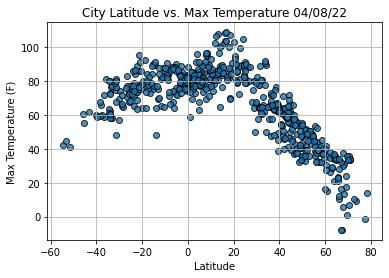

In [78]:
#Import time module
import time

#Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")



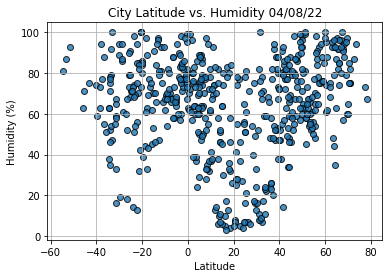

In [79]:
#Build the scatter plot for latitude vs humidity 
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

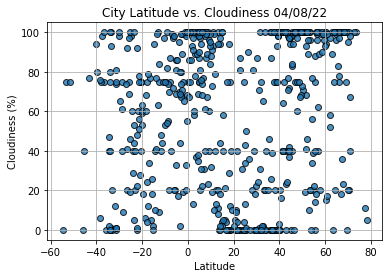

In [80]:
#Build the scatter plot for latitude vs cloudiness 
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

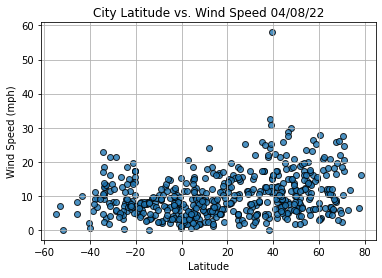

In [81]:
#Build the scatter plot for latitude vs windspped 
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [82]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [83]:
index13 = city_data_df.loc[13]
index13

City                     Victoria
Country                        HK
Date          2022-04-08 16:17:08
Lat                       22.2855
Lng                      114.1577
Max Temp                    72.32
Humidity                       77
Cloudiness                      0
Wind Speed                  15.99
Name: 13, dtype: object

In [84]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
542     True
543     True
544     True
545     True
546     True
Name: Lat, Length: 547, dtype: bool

In [85]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Pangnirtung,CA,2022-04-08 16:20:56,66.1451,-65.7125,10.40,85,75,5.75
3,Nanortalik,GL,2022-04-08 16:20:57,60.1432,-45.2371,30.27,74,15,6.42
4,Taoudenni,ML,2022-04-08 16:20:58,22.6783,-3.9836,99.84,5,0,8.81
7,Skibbereen,IE,2022-04-08 16:20:59,51.5500,-9.2667,49.10,45,41,18.86
10,Qaanaaq,GL,2022-04-08 16:21:01,77.4840,-69.3632,-1.41,73,11,6.49


In [86]:
# Create N and S Hemisphere DFs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

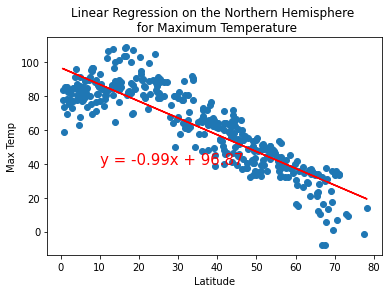

In [87]:
#Linear regression on the N Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

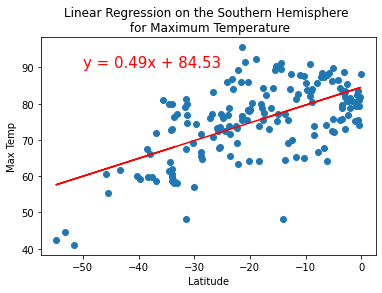

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

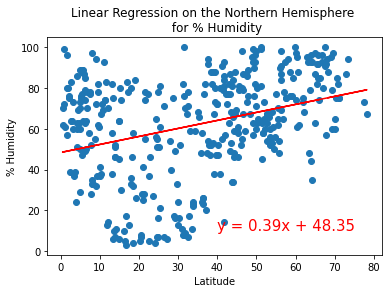

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


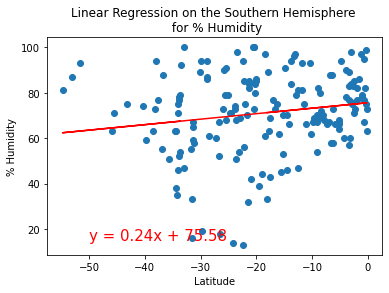

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

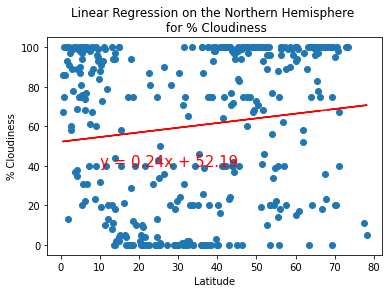

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,40))

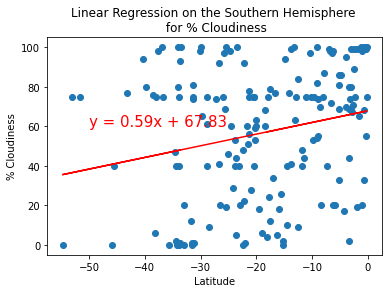

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

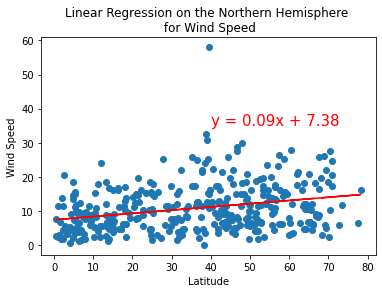

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

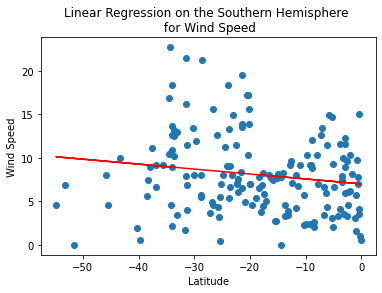

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))